## Smart Trash Containers - most environmentally friendly neighborhood

Introduction: This personal notebook is looking for which neighborhood has the most smart trash cans per acre of area. I started by finding the neighborhoods that have the most smart trash cans and then incorporated the acreage of each neighborhood to calculate a ratio of the amount of smart trash cans to acreage in each neighborhood. 

Metric (my personal notebook): The neighborhood with the largest ratio is the most environmentally friendly and the neighborhood with the lowest ratio is the least environmentally friendly. 

<img src="https://media.giphy.com/media/20H2oMaHOOF5keL1Tx/giphy.gif" width="250" align="center">

## Read .CSV files 

In [1]:
# imported pandas, numpy, and matplotlib
# read the .csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
trash = pd.read_csv('PittsburghSmartTrash.csv')

## Preliminary Analysis of Dataset

In [2]:
# current top 10 items in neighborhood column
trash['neighborhood'].head(10)

0       Central Northside
1       Central Northside
2        Allegheny Center
3       Central Northside
4    California-Kirkbride
5      Marshall-Shadeland
6    California-Kirkbride
7        Allegheny Center
8              Manchester
9             Perry North
Name: neighborhood, dtype: object

In [4]:
# total number of smart trash cans overall in the dataframe
trash['neighborhood'].count()

1208

In [4]:
## find where most smart trash cans are
trash['neighborhood'].value_counts()

Shadyside              77
East Liberty           68
Squirrel Hill South    64
Bloomfield             59
South Side Flats       56
                       ..
Bedford Dwellings       1
East Carnegie           1
St. Clair               1
Oakwood                 1
Windgap                 1
Name: neighborhood, Length: 79, dtype: int64

In [7]:
# data grouped together by the neighborhood
trash.groupby('neighborhood').count()

,container_id,receptacle_model_id,assignment_date,last_updated_date,group_name,address,city,state,zip,dpw_division,council_district,ward,fire_zone,x,y
neighborhood,,,,,,,,,,,,,,,
Allegheny Center,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Allegheny West,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Allentown,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Arlington,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Banksville,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
West End,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
West Oakland,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


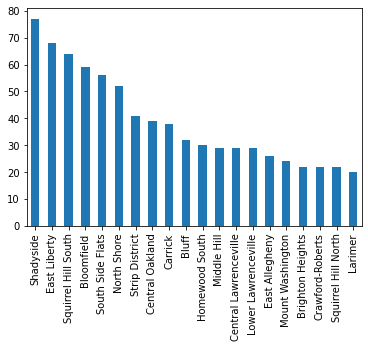

In [8]:
# plotted top 20 (most smart trash cans)
trash['neighborhood'].value_counts().head(20).plot.bar()

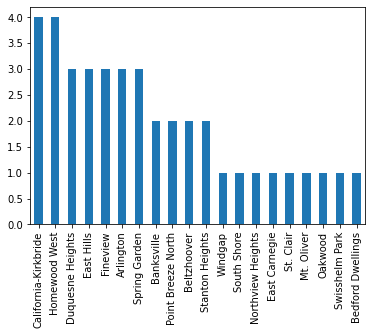

In [10]:
# plotted bottom 20 (least smart trash cans)
trash['neighborhood'].value_counts().tail(20).plot.bar()

## Adding Meaning to The Data
Even though certain neighborhoods have a lot of trash cans, they may be really spread apart throughout a larger area, so the area of the neighborhood needs to be taken into consideration when it comes to the number of smart trash cans per neighborhood.

In [13]:
# imported neighborhoods to get ratio of # of smart trash cans to acres of area
hood = pd.read_csv('neighborhoods.csv')

#created a new table called grouped_df which just has the neighborhoods and the acres by taking those two columns from the neighborhood csv file
grouped_df = hood[["hood", "acres"]] 
# printing out the table with hood and acres
grouped_df

,hood,acres
0,Chateau,246.501
1,Summer Hill,282.104
2,Northview Heights,201.558
3,Spring Hill-City View,404.765
4,Perry South,581.656
...,...,...
85,Overbrook,539.515
86,Chartiers City,84.954
87,Esplen,147.829
88,Ridgemont,237.059


In [17]:
# creates a new column with the value_counts and automatically calls it neighborhood
# renamed the neighborhood column to hood 
# to_frame is used to convert it from a series to a dataframe 
total = trash['neighborhood'].value_counts().to_frame().rename_axis("hood")
# renamed the column neighborhood to frequency to avoid confusion
total = total.rename(columns = {"neighborhood": "frequency"})
# merged the series with just the hood and the acres with the trash dataframe with just the neighborhood and frequency columns
total = total.merge(grouped_df, how = "left", left_on = "hood", right_on="hood")
# created new column called ratio and equated it to the frequency column divided by the acres 
total["ratio"] = total["frequency"] / total["acres"]
# replaced the NaN and inf values with 0, so it doesn't mess with the data and mapping
total = total.replace([np.inf, -np.inf, np.NaN], 0)
# sorted the values more nicely in the dataframe from highest to lowest
total = total.sort_values("ratio",ascending=False)
# printed out the dataframe
total

,hood,frequency,acres,ratio
5,North Shore,52,195.014,0.266648
7,Central Oakland,39,180.883,0.215609
1,East Liberty,68,373.650,0.181988
35,Friendship,12,68.297,0.175703
14,East Allegheny,26,151.705,0.171385
...,...,...,...,...
74,Windgap,1,266.678,0.003750
76,East Carnegie,1,277.895,0.003598
71,Swisshelm Park,1,308.575,0.003241
68,Banksville,2,622.919,0.003211


In [23]:
# printing out 20 neighborhoods with highest ratio
total.head(20)

,hood,frequency,acres,ratio
5,North Shore,52,195.014,0.266648
7,Central Oakland,39,180.883,0.215609
1,East Liberty,68,373.650,0.181988
35,Friendship,12,68.297,0.175703
14,East Allegheny,26,151.705,0.171385
30,Allegheny West,14,90.841,0.154115
9,Bluff,32,210.510,0.152012
12,Middle Hill,29,196.108,0.147878
18,Crawford-Roberts,22,166.101,0.132450
3,Bloomfield,59,451.405,0.130703


In [24]:
#printing out 20 neighborhoods with lowest ratio
total.tail(20)

,hood,frequency,acres,ratio
45,Lincoln Place,7,632.497,0.011067
67,Point Breeze North,2,183.781,0.010883
53,Perry South,6,581.656,0.010315
65,Arlington,3,302.320,0.009923
60,Spring Hill-City View,4,404.765,0.009882
74,Bedford Dwellings,1,115.252,0.008677
61,East Hills,3,348.077,0.008619
43,Beechview,8,938.804,0.008521
64,Duquesne Heights,3,400.468,0.007491
68,Beltzhoover,2,270.374,0.007397


## Visualizing this Meaningful Data

[Text(0, 0.5, 'Ratios(amount/acres)'), Text(0.5, 0, 'Neighborhoods')]

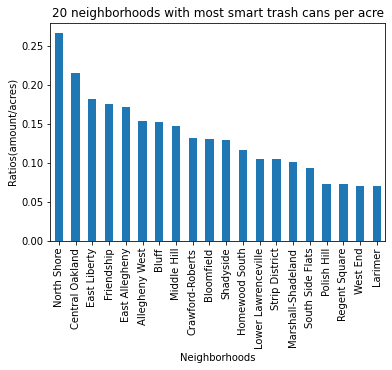

In [25]:
# created a bar graph with the top 20 neighborhoods based on the ratio

#dropped the frequnecy column and acres column to just leave hood and ratio
r = total.drop(columns='frequency')
t = r.drop(columns='acres')
# created a bar plot with no legend and the title: 20 neighborhoods with most smart trash cans per acre
ax = t.head(20).plot(kind="bar",legend=False, title="20 neighborhoods with most smart trash cans per acre")
# set the tick labels on the x axis with the top 20 neighborhoods
ax.set_xticklabels(t['hood'].head(20))
# set the x and y axis labels to neighborhoods and ratios
ax.set(xlabel="Neighborhoods", ylabel="Ratios(amount/acres)") 

[Text(0, 0.5, 'Ratios(amount/acres)'), Text(0.5, 0, 'Neighborhoods')]

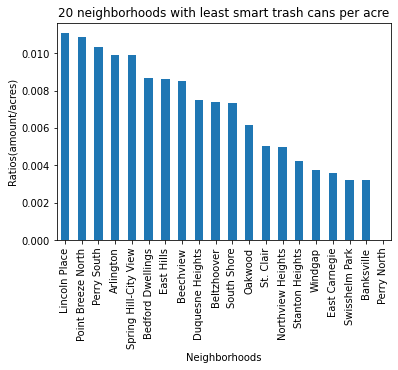

In [27]:
# created a bar graph with the bottom 20 neighborhoods based on the ratio with no legend and the title: 20 neighborhoods with least smart trash cans per acre
ax2 = t.tail(20).plot(kind="bar",legend=False, title="20 neighborhoods with least smart trash cans per acre")
# set x tick labels to bottom 20 neighborhood names
ax2.set_xticklabels(t['hood'].tail(20))
# set the x and y label to neighborhoods and ratios
ax2.set(xlabel="Neighborhoods", ylabel="Ratios(amount/acres)") 

## Vizualizing the data in the context of neighborhoods

In [18]:
# getting it in context of neighborhood
import geopandas
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
# merged the geopandas read shape file with the dataframe which contained the hood and ratio columns
map = neighborhoods.merge(total, how='left', left_on='hood', right_on='hood')
# look at the head to confirm it merged correctly
map[['hood','ratio']].head()

,hood,ratio
0,Central Oakland,0.215609
1,North Oakland,0.046776
2,West Oakland,0.065042
3,Crawford-Roberts,0.132450
4,Strip District,0.104896


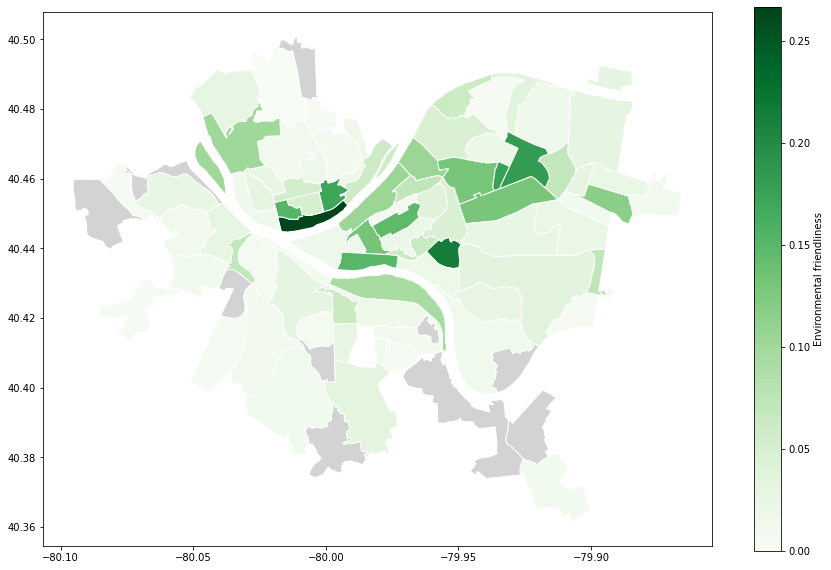

In [19]:
# chloropleth map of pittsburgh
map.plot(column='ratio', # set the ratio column to be used for coloring
               cmap='Greens',              # chose a green color palette
               edgecolor="white",        # outlined the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Environmental friendliness"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

This shows that according to the metric of smart trash cans alone North Shore is the most environmentally friendly neighborhood in Pittsburgh and Banksville is the least environmentally friendly. Smart trash cans allow for the most effective collections which reduces trash truck pollution and the pollution on the streets. Becuase North Shore has the largest smart trash can to acre ratio, it is the most environmentally friendly. Similarly, because Banksville has the least smart trash can to acre ratio, it is the least environmentally friendly. Although, Perry North technically has the lowest, that is because it has an inf value, so it was replaced with 0, making it the lowest. Therefore, I do not count it when it comes to worst neighborhood.